[IRIS 꽃잎 길이기반 너비 예측 모델]
- 데이터셋 : Iris
- 학습종류: 지도학습 / 회귀(Regression)
- 알고리즘: 분석 후 결정

[1] 모듈 로딩 및 데이터 준비

In [1]:
#[1-1] 모듈 로딩

import pandas as pd		# 데이터 분석 및 전처리용 모듈
import matplotlib.pyplot as plt  # 데이터 시각화
import koreanize_matplotlib
from sklearn.model_selection import train_test_split # 학습용 /검증용 / 테스트용 데이터 분리 및 처리용 모듈

In [ ]:
# 데이터 준비

irisDF = pd.read_csv('../Data/iris.csv', usecols=['petal.length','petal.width'])

irisDF.head()

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) miss

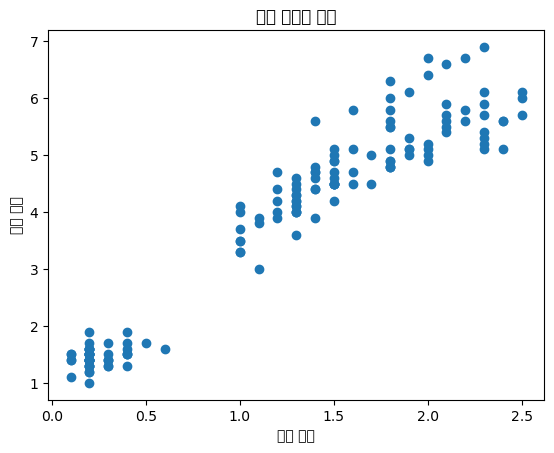

In [ ]:
plt.scatter(irisDF['petal.width'],irisDF['petal.length'])
plt.xlabel('꽃잎 너비')
plt.ylabel('꽃잎 길이')
plt.title('꽃잎 길이와 너비')
plt.show()

- 탐색적 분석의 결과
	* 데이터 분포 분석 : 길이에 따른 너비가 증가하는 양상 보임
	* 주의 : 품종에 따라서 길이가 모여 있음
	* 알고리즘 : 선형회귀로 진행

[3] 데이터 셋 준비
- 학습용 데이터 셋: 학습에만 사용 > 해당 데이터셋에서 피쳐와 타겟의 규칙 / 패턴 탐색
- 검증용 데이터 셋: 학습 중 규칙 / 패턴 제대로 학습 여부 검사
- 테스트용 데이터 셋: 모델 완성 후 테스트용 데이터 셋
- sklearn 패키지 특성으로 학습용과 테스트용만 사용

In [ ]:
# [3-1] 피쳐와 타겟 분리
featureDF = irisDF[['petal.length']]
targetSR = irisDF['petal.width']

print(f" featureDF > {featureDF.ndim}D shape > {featureDF.shape}")
print(f" targetSR > {targetSR.ndim}D shape > {targetSR.shape}")


 featureDF > 2D shape > (150, 1)
 targetSR > 1D shape > (150,)


In [ ]:
# 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=5)

In [ ]:
print(f'X_train => {X_train.ndim}D,   {X_train.shape}')
print(f'X_test => {X_test.ndim}D,   {X_test.shape}')

print(f'y_train => {y_train.ndim}D,   {y_train.shape}')
print(f'y_test => {y_test.ndim}D,   {y_test.shape}')

X_train => 2D,   (112, 1)
X_test => 2D,   (38, 1)
y_train => 1D,   (112,)
y_test => 1D,   (38,)


In [ ]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression # 알고리즘 모듈
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error # 성능평가 관련 모듈
 

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 학습 후 모델에 적용되는 a,b : 모델 파라미터

print(f" coef_ : {lr.coef_}, intercept_: {lr.intercept_}")

 coef_ : [0.41794253], intercept_: -0.3706155959094948


In [ ]:
# 모델 / 수식에 데이터 적용해서 예측값
pre_y = lr.predict(X_train) 

# 모델 적합도 : 높을 수록 좋다 (1.0)
score = lr.score(X_train,pre_y)

# 오차 계산 : 낮을 수록 좋다 (0.0)
rmse = root_mean_squared_error(y_train, pre_y)

print(f"[X_train] score > {score}, rmse > {rmse}")

[X_train] score > 1.0, rmse > 0.20030000303225326


In [ ]:
# 테스트용 데이터 셋
pre_y = lr.predict(X_test) 

# 모델 적합도 : 높을 수록 좋다 (1.0)
score = lr.score(X_test,pre_y)

# 오차 계산 : 낮을 수록 좋다 (0.0)
rmse = root_mean_squared_error(y_test, pre_y)

print(f"[X_test] score > {score}, rmse > {rmse}")

[X_test] score > 1.0, rmse > 0.218784706145599
